 Credit EDA Case Study

In [1]:
## Import the required Libraries.
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored

## Data Cleaning

### Data Reading and Data types


In [3]:
data_set = pd.read_csv("D:/Leena_DataScience/EDA_CaseStudy/application_data.csv")
data_set.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#Shape of dataset
data_set.shape

(307511, 122)

In [5]:
# Data Types of each column
data_set.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [6]:
data_set.info(verbose=all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

#### Finding percentage of missing values in each column

In [7]:
# Finding missing values and dropping columns with high percentage of missing values(mre than 60%)
data = copy.deepcopy(data_set)
# Percentange of missing values for all columns
100*(data.isna().sum()/len(data))

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

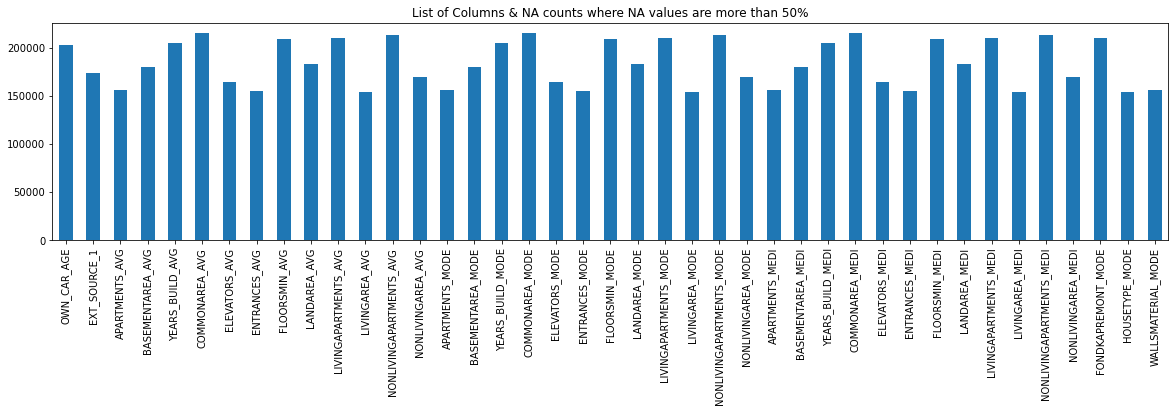

In [8]:
NA_col = data_set.isnull().sum()
NA_col = NA_col[NA_col.values >(0.5*len(data_set))]
plt.figure(figsize=(20,4))
NA_col.plot(kind='bar')
plt.title('List of Columns & NA counts where NA values are more than 50%')
plt.show()

#### Removing high null Values

In [9]:
data = data.dropna(thresh=data.shape[0]*0.5,how='all', axis=1)
data.shape

(307511, 81)

## Data Handling

### Imputing missing values

In [10]:
307511*.13 ## we will consider where missing value is less that 39976
#(data.count()/len(data))*100 > 87.0

39976.43

In [11]:
data.columns #CODE_GENDER, AMT_INCOME_TOTAL, OCCUPATION_TYPE, NAME_INCOME_TYPE, DAYS_EMPLOYED

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

In [12]:
'''
Checking whether column has any missing values and consider top 5 candidates to analyze further
The targeted columns cover 2 cases
1. very few null values 1 to 10
2. considerably less number of null values 100 to 1000

'''
#data.TARGET.isnull().sum() # 0
print(data.AMT_ANNUITY.isna().sum()) #1 column to consider for imputing missing value
print(data.AMT_GOODS_PRICE.isna().sum()) #5 column to consider for imputing missing value
print(data.CNT_FAM_MEMBERS.isna().sum()) #2 column to consider for imputing missing value
print(data.EXT_SOURCE_2.isna().sum())  #4 column to consider for imputing missing value
print(data.DAYS_LAST_PHONE_CHANGE.isna().sum()) #3 column to consider for imputing missing value


# Following fileds also has missing values apart from above values
# print(data.NAME_TYPE_SUITE.isna().sum())
# print(data.OCCUPATION_TYPE.isna().sum())
# print(data.OBS_30_CNT_SOCIAL_CIRCLE.isna().sum())
# print(data.DEF_30_CNT_SOCIAL_CIRCLE.isna().sum())
# print(data.OBS_60_CNT_SOCIAL_CIRCLE.isna().sum())
# print(data.DEF_60_CNT_SOCIAL_CIRCLE.isna().sum())
# print(data.AMT_REQ_CREDIT_BUREAU_HOUR.isna().sum())
# print(data.AMT_REQ_CREDIT_BUREAU_DAY.isna().sum())
# print(data.AMT_REQ_CREDIT_BUREAU_WEEK.isna().sum())
# print(data.AMT_REQ_CREDIT_BUREAU_MON.isna().sum())
# print(data.AMT_REQ_CREDIT_BUREAU_QRT.isna().sum())
# print(data.AMT_REQ_CREDIT_BUREAU_YEAR.isna().sum())
# print(data.EXT_SOURCE_3.isna().sum())

12
278
2
660
1


### Handling missing values in AMT_ANNUITY

In [13]:

test_data = copy.deepcopy(data) # copying to a variable, so as not to modify the existing data.


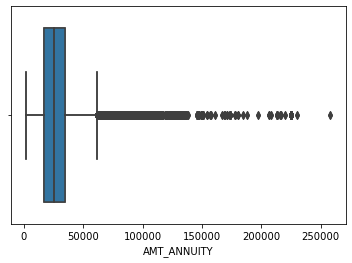

In [14]:
'''
Impute the missing value with mean/median/mode.

We see that the major value for AMT_ANNUITY is 9000.0
Hence we can replace the missing values with mean and it won't change the authenticity of dataset

'''

#Checking if outliers are there
sns.boxplot(data['AMT_ANNUITY'])
# we can replace it with mean as there is one outlier
test_data = copy.deepcopy(data)

test_data.AMT_ANNUITY.fillna(test_data.AMT_ANNUITY.mean, inplace = True)
test_data.AMT_ANNUITY.isna().sum()
sns.boxplot(data['AMT_ANNUITY'])
plt.show()
#print('\n',test_data.AMT_ANNUITY.describe(),'\n\n', data.AMT_ANNUITY.describe())

### Handling missing values in DAYS_LAST_PHONE_CHANGE and CNT_FAM_MEMBERS

In [15]:
'''
Delete rows and columns: Rows can be deleted if the number of missing values is insignificant, 
as this would not impact the overall analysis results. 
Columns can be removed if the missing values are significant in number.

The number of null values for DAYS_LAST_PHONE_CHANGE and CNT_FAM_MEMBERS are insignificant which is 1 and 2 respectively 
Hence we can delete these 2 rows. 
'''
test_data = copy.deepcopy(data)
test_data =test_data[~test_data['CNT_FAM_MEMBERS'].isnull()]
print(test_data.CNT_FAM_MEMBERS.isna().sum())
test_data =test_data[~test_data['DAYS_LAST_PHONE_CHANGE'].isnull()]
print(test_data.DAYS_LAST_PHONE_CHANGE.isna().sum())
 

0
0


### Handling missing values in EXT_SOURCE_2

0.5659614260608526


0

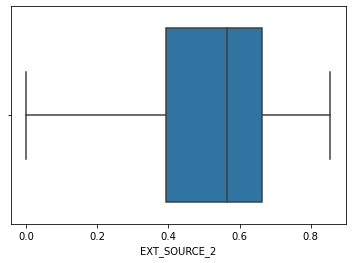

In [16]:
'''
Ext_source_2 missing could refer that the user does not have any score from external data source
If we check the median of the column, a significant number of users have median as EXT_SOURCE_2 
we can replace the missing values with median
'''

test_data = copy.deepcopy(data)
test_data.EXT_SOURCE_2.value_counts() # shows that it is a continuous variable.
sns.boxplot(data['EXT_SOURCE_2']) # checking if outliers are there, can see no outliers.
# Replacing it with mean.
print(test_data.EXT_SOURCE_2.median())
# we can replace the null values with the median value.
test_data.AMT_ANNUITY.fillna(test_data.EXT_SOURCE_2.median(), inplace = True)
test_data.AMT_ANNUITY.isna().sum()
#test_data[~test_data["EXT_SOURCE_2"].isnull()]


### Handling missing values in AMT_GOODS_PRICE

In [17]:
'''
This is the price of good that the client asked for in previous application and it is conditional
Misiing value may pressent not applicable cases
We can replace with 0

'''
test_data = copy.deepcopy(data)
test_data.AMT_GOODS_PRICE.isna().sum()
test_data.AMT_GOODS_PRICE.describe() # Data type is float and missing values are already replaced with NaN.
#data.AMT_GOODS_PRICE.mode() #450000
test_data.AMT_GOODS_PRICE.fillna(0, inplace = True)
print(test_data.AMT_GOODS_PRICE.describe(),'\n',
data.AMT_GOODS_PRICE.describe())
test_data.AMT_GOODS_PRICE.isna().sum()

count    3.075110e+05
mean     5.379095e+05
std      3.696338e+05
min      0.000000e+00
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64 
 count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


0

### categorical columns

In [18]:
'''
The CODE_GENDER contains M, F, XNA

'''
test_data = copy.deepcopy(data)
test_data.CODE_GENDER.value_counts()
# Considering the high value of F, we can replcae the XNA with F
test_data = test_data[data['CODE_GENDER'] != 'XNA']

### Checking Data types and FInding if anything to change

In [19]:
data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 81, dtype: object

In [20]:
# Correcting the DAYS_BIRTH column
data.DAYS_BIRTH = -1*data.DAYS_BIRTH
data.DAYS_EMPLOYED = -1*data.DAYS_EMPLOYED
data.DAYS_REGISTRATION = -1*data.DAYS_REGISTRATION
data.DAYS_ID_PUBLISH = -1*data.DAYS_ID_PUBLISH

In [21]:
data.DAYS_BIRTH.describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

In [22]:
data.DAYS_EMPLOYED = np.where(data.DAYS_EMPLOYED < 0, -1*data.DAYS_EMPLOYED, data.DAYS_EMPLOYED)

In [23]:
for col in data.columns:
    if data[col].dtype == 'object':
        print (col)


NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
OCCUPATION_TYPE
WEEKDAY_APPR_PROCESS_START
ORGANIZATION_TYPE
EMERGENCYSTATE_MODE


In [24]:
# Converting loan category to categorical data type
data['NAME_CONTRACT_TYPE'] = data['NAME_CONTRACT_TYPE'].astype('category')


In [25]:
data['CODE_GENDER'] = np.where(data['CODE_GENDER'] == 'XNA', 'F', data['CODE_GENDER'])
# Converting loan category to categorical data type
data['CODE_GENDER'] = data['CODE_GENDER'].astype('category')

In [26]:
data['FLAG_OWN_CAR'] = data['FLAG_OWN_CAR'].astype('category')
data['FLAG_OWN_REALTY'] = data['FLAG_OWN_REALTY'].astype('category')
data['WEEKDAY_APPR_PROCESS_START'] = data['WEEKDAY_APPR_PROCESS_START'].astype('category')
data['NAME_FAMILY_STATUS'] = data['NAME_FAMILY_STATUS'].astype('category')
data['NAME_EDUCATION_TYPE'] = data['NAME_EDUCATION_TYPE'].astype('category')

In [27]:
#NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS


## Treating outliers

- OBS_60_CNT_SOCIAL_CIRCLE
- AMT_INCOME_TOTAL
- DAYS_BIRTH
- DAYS_EMPLOYED

#### OBS_60_CNT_SOCIAL_CIRCLE

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

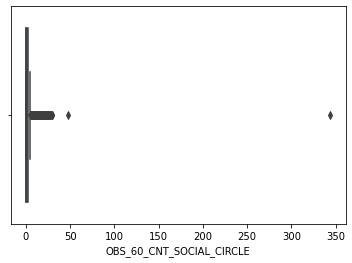

In [28]:

# The graph clearly shows that, there is one outstanding outlier which is making a huge differnce between 75% and max
# We can see from boxplot
sns.boxplot(data['OBS_60_CNT_SOCIAL_CIRCLE'])
data['OBS_60_CNT_SOCIAL_CIRCLE'].describe()


In [29]:
data[data.OBS_60_CNT_SOCIAL_CIRCLE>50]
# we can delete this value
data = data[data.OBS_60_CNT_SOCIAL_CIRCLE<40]
data['OBS_60_CNT_SOCIAL_CIRCLE'].describe()

count    306488.000000
mean          1.404026
std           2.296467
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          30.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

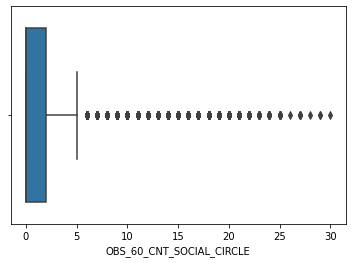

In [30]:
# After treating the outlier
sns.boxplot(data['OBS_60_CNT_SOCIAL_CIRCLE'])
plt.show()

#### AMT_INCOME_TOTAL

In [31]:
data['AMT_INCOME_TOTAL'].describe()

count    3.064880e+05
mean     1.686300e+05
std      2.372664e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.453500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [32]:
data['AMT_INCOME_TOTAL'].value_counts()

135000.0    35633
112500.0    30924
157500.0    26479
180000.0    24640
90000.0     22417
            ...  
404406.0        1
101119.5        1
79425.0         1
101128.5        1
262174.5        1
Name: AMT_INCOME_TOTAL, Length: 2544, dtype: int64

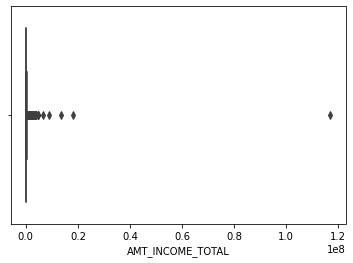

In [33]:
sns.boxplot(data['AMT_INCOME_TOTAL']) # Clearly see that there are outliers, and with one exceptionally high value
plt.show()

In [34]:
data.AMT_INCOME_TOTAL.quantile([.5,.7,.9,.95,.98,.99,1]) 

# Here we can cap the max value with average value so as not to loose the person count

0.50    1.453500e+05
0.70    1.800000e+05
0.90    2.700000e+05
0.95    3.375000e+05
0.98    4.275000e+05
0.99    4.590977e+05
1.00    1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [35]:
#Capping the outliers with next max value
data['AMT_INCOME_TOTAL'] = np.where(data['AMT_INCOME_TOTAL'] >480000.0, 472500.0,data['AMT_INCOME_TOTAL'])
data.AMT_INCOME_TOTAL.quantile([.5,.7,.9,.95,.98,.99,1]) 

0.50    145350.000
0.70    180000.000
0.90    270000.000
0.95    337500.000
0.98    427500.000
0.99    459097.695
1.00    479250.000
Name: AMT_INCOME_TOTAL, dtype: float64

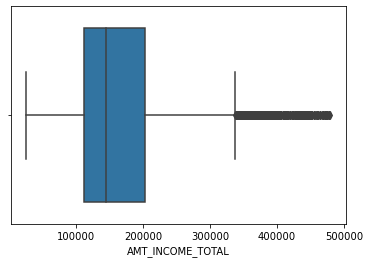

In [36]:
sns.boxplot(data['AMT_INCOME_TOTAL']) # post outlier treatment
plt.show()

In [37]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

#### DAYS_BIRTH

In [38]:
data.DAYS_BIRTH.describe()

count    306488.000000
mean      16037.966886
std        4363.636687
min        7489.000000
25%       12414.000000
50%       15751.000000
75%       19681.250000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

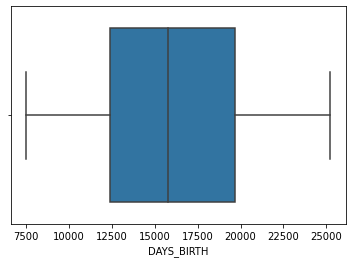

In [39]:
sns.boxplot(data['DAYS_BIRTH']) # Clearly see that this is a continuous varibale with no outlier.
plt.show()

#### DAYS_EMPLOYED

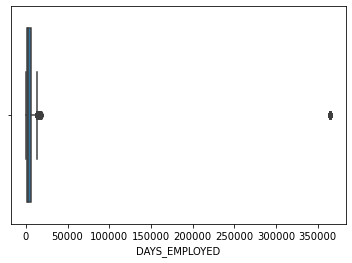

In [40]:
sns.boxplot(data['DAYS_EMPLOYED']) # There is one exceptional high value outlier.
plt.show()

In [41]:
data.DAYS_EMPLOYED.value_counts() # There is one exceptional value 365243 in 55202 records

365243    55202
200         156
199         151
224         151
230         150
          ...  
14719         1
11555         1
13797         1
14832         1
14991         1
Name: DAYS_EMPLOYED, Length: 12565, dtype: int64

In [42]:
#Digging deeper and checking the other columns.
data[data.DAYS_EMPLOYED == 365243].describe()
# Most of the columns are having data, in which case we can not drop the value.
# As the value is really high, we can cap the value with the max value.

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,55202.000000,55202.000000,55202.000000,55202.000000,5.520200e+04,55202.000000,5.518000e+04,55202.000000,55202.000000,55202.0,...,55202.000000,55202.000000,55202.000000,55202.0,47578.000000,47578.000000,47578.000000,47578.000000,47578.000000,47578.000000
mean,278497.233923,0.054038,0.046140,135536.632601,5.427480e+05,23897.143863,4.881859e+05,0.020723,21812.953353,365243.0,...,0.000362,0.000072,0.000018,0.0,0.005549,0.007125,0.035773,0.200513,0.291521,2.100046
std,102669.593140,0.226095,0.276016,71227.259566,3.783793e+05,13278.117293,3.469140e+05,0.013604,2004.522157,0.0,...,0.019031,0.008512,0.004256,0.0,0.077875,0.109704,0.213227,0.745884,0.640772,2.042097
min,100011.000000,0.000000,0.000000,25650.000000,4.500000e+04,1615.500000,4.500000e+04,0.000290,7691.000000,365243.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189633.250000,0.000000,0.000000,90000.000000,2.547000e+05,14512.500000,2.250000e+05,0.010032,20840.000000,365243.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,279001.500000,0.000000,0.000000,117000.000000,4.584600e+05,21775.500000,4.500000e+05,0.018850,22052.000000,365243.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367059.250000,0.000000,0.000000,166500.000000,7.551900e+05,29932.875000,6.750000e+05,0.026392,23176.000000,365243.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456252.000000,1.000000,14.000000,477000.000000,3.312162e+06,225000.000000,3.150000e+06,0.072508,25229.000000,365243.0,...,1.000000,1.000000,1.000000,0.0,3.000000,8.000000,8.000000,22.000000,7.000000,25.000000


In [43]:
data[data.DAYS_EMPLOYED < 365243].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,251286.000000,251286.000000,251286.000000,251286.000000,2.512860e+05,251274.000000,2.510300e+05,251286.000000,251286.000000,251286.000000,...,251286.000000,251286.000000,251286.000000,251286.000000,217561.000000,217561.000000,217561.000000,217561.000000,217561.000000,217561.000000
mean,278109.860319,0.086778,0.498683,172572.650015,6.119784e+05,27831.898643,5.497764e+05,0.020874,14769.329545,2384.317363,...,0.009869,0.000712,0.000617,0.000406,0.006573,0.006996,0.034110,0.282059,0.259987,1.857511
std,102814.212049,0.281509,0.763320,83801.564912,4.066064e+05,14634.820761,3.733161e+05,0.013854,3661.391023,2338.550555,...,0.098853,0.026680,0.024828,0.020143,0.085020,0.111182,0.202914,0.948006,0.824244,1.826168
min,100002.000000,0.000000,0.000000,25650.000000,4.500000e+04,1980.000000,4.050000e+04,0.000290,7489.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189023.750000,0.000000,0.000000,112500.000000,2.784600e+05,17095.500000,2.475000e+05,0.010006,11776.000000,767.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278068.500000,0.000000,0.000000,157500.000000,5.212800e+05,25861.500000,4.500000e+05,0.018850,14572.000000,1648.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367155.500000,0.000000,1.000000,211500.000000,8.302140e+05,35617.500000,6.975000e+05,0.028663,17563.000000,3175.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,479250.000000,4.050000e+06,258025.500000,4.050000e+06,0.072508,25200.000000,17912.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,23.000000


##### If we analyze the above 2 distributions, the max is nearly same for both the condition DAYS_EMPLOYED < 365243 and DAYS_EMPLOYED == 365243.
##### There is a huge shift in mean for REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_REGISTRATION, so we can replace the value with max values

In [44]:
data.DAYS_EMPLOYED.quantile([.8,.82,.85,.9,.95,.98,.99,1])

0.80      9195.0
0.82    365243.0
0.85    365243.0
0.90    365243.0
0.95    365243.0
0.98    365243.0
0.99    365243.0
1.00    365243.0
Name: DAYS_EMPLOYED, dtype: float64

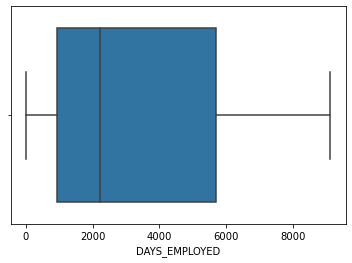

In [45]:
data['DAYS_EMPLOYED'] = np.where(data['DAYS_EMPLOYED'] >9125, 9125,data['DAYS_EMPLOYED'])
sns.boxplot(data['DAYS_EMPLOYED']) # One exceptional high value outlier.
plt.show()

## Binning of Continuous variable

- AMT_ANNUITY
- AMT_GOODS_PRICE

In [46]:
'''
If we see the analysis, we can see that the outliers are not real outliers, they are relevant information
So insteaad of caping or dropping those, we can bucket those as higher income group

'''
data['AMT_ANNUITY'].describe()



count    306476.000000
mean      27123.176480
std       14479.044761
min        1615.500000
25%       16564.500000
50%       24930.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [47]:
BUCKET = [0,20000,50000,300000]

labels = ['Low Income','Avg Income','High Income']
data['AMT_ANNUITY_BUCKET'] = pd.cut(data['AMT_ANNUITY'], bins = BUCKET, labels = labels)
data['AMT_ANNUITY_BUCKET'].value_counts()

Avg Income     179399
Low Income     105885
High Income     21192
Name: AMT_ANNUITY_BUCKET, dtype: int64

#### AMT_GOODS_PRICE

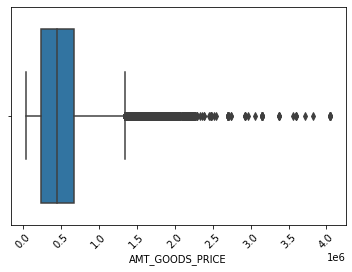

In [48]:
sns.boxplot(data['AMT_GOODS_PRICE'])
plt.xticks(rotation=45)
plt.show()
## From the plot, we can see that the outliers are pretty continuous, which means that they are not real outliers
## So we can bucket these in one.

In [49]:
data['AMT_GOODS_PRICE'].describe()

count    3.062100e+05
mean     5.386776e+05
std      3.694567e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [50]:
BUCKET = [0,240000,700000,5000000]

labels = ['Cheap Goods','Average Goods','Expensive Goods']
data['AMT_GOODS_PRICE_BUCKET'] = pd.cut(data['AMT_GOODS_PRICE'], bins = BUCKET, labels = labels)
data['AMT_GOODS_PRICE_BUCKET'].value_counts()

Average Goods      155358
Cheap Goods         79565
Expensive Goods     71287
Name: AMT_GOODS_PRICE_BUCKET, dtype: int64

# Data Analysis

### Imbalance Percentage

In [51]:
100*data['TARGET'].value_counts(normalize = True)
#with respect to target column, the dataset is imbalance data set.

0    91.911918
1     8.088082
Name: TARGET, dtype: float64

In [52]:
100*data['CODE_GENDER'].value_counts(normalize = True)

F    65.84173
M    34.15827
Name: CODE_GENDER, dtype: float64

### Divide Data set based on TARGET

In [53]:
TARGET_ONE = data[data.TARGET == 1]
TARGET_ZERO = data[data.TARGET == 0]

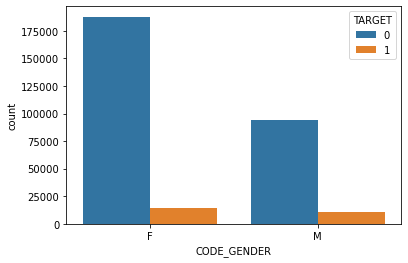

In [54]:
sns.countplot(x = 'CODE_GENDER', hue='TARGET', data = data)
plt.show()

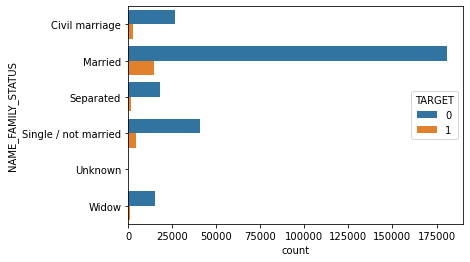

In [55]:
sns.countplot(y = 'NAME_FAMILY_STATUS', hue='TARGET', data = data)
plt.show()

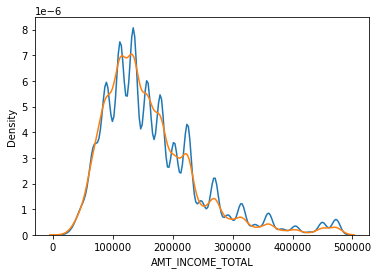

In [56]:
TARGET = [0, 1]

for i in TARGET:
    subset = data[data['TARGET']==i]
    sns.distplot(subset['AMT_INCOME_TOTAL'], hist = False)

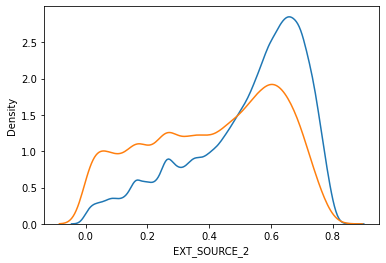

In [57]:
for i in TARGET:
    subset = data[data['TARGET']==i]
    sns.distplot(subset['EXT_SOURCE_2'], hist = False)

### Univariate Analysis - Categorical Variables

- CODE_GENDER, NAME_CONTRACT_TYPE, WEEKDAY_APPR_PROCESS_START, FLAG_OWN_REALTY, FLAG_OWN_CAR

In [58]:
TARGET_ONE.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

<AxesSubplot:>

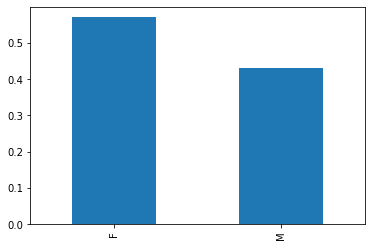

In [59]:
TARGET_ONE.CODE_GENDER.value_counts(normalize = True).plot.bar()

<AxesSubplot:>

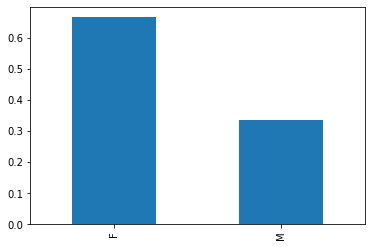

In [60]:
TARGET_ZERO.CODE_GENDER.value_counts(normalize = True).plot.bar()

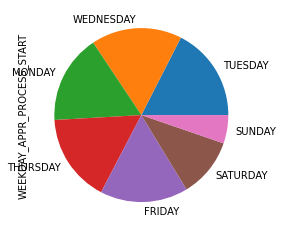

In [61]:
TARGET_ZERO.WEEKDAY_APPR_PROCESS_START.value_counts(normalize = True).plot.pie()
plt.show()

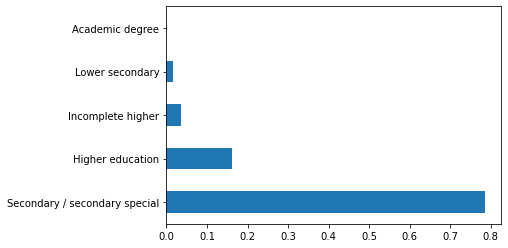

In [62]:
TARGET_ONE.NAME_EDUCATION_TYPE.value_counts(normalize = True).plot.barh()
plt.show()#, NAME_FAMILY_STATUS

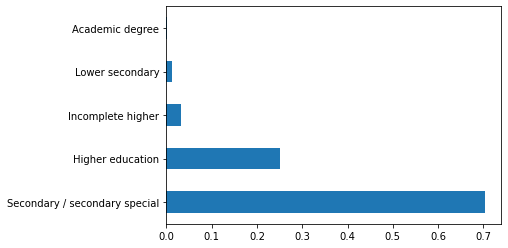

In [63]:
TARGET_ZERO.NAME_EDUCATION_TYPE.value_counts(normalize = True).plot.barh()
plt.show()

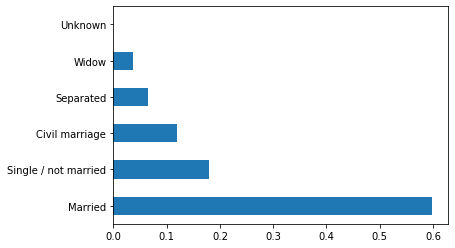

In [64]:
TARGET_ONE.NAME_FAMILY_STATUS.value_counts(normalize = True).plot.barh()
plt.show()

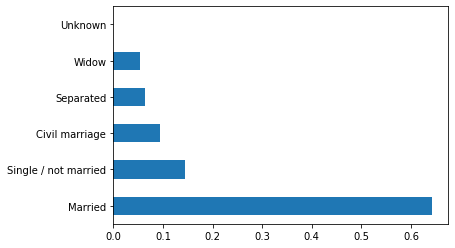

In [65]:
TARGET_ZERO[~(TARGET_ZERO.NAME_FAMILY_STATUS == 'Unknown')].NAME_FAMILY_STATUS.value_counts(normalize = True).plot.barh()
plt.show()

## Univariate for numerical variables

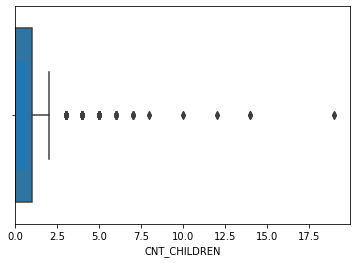

In [66]:
TARGET_ZERO.CNT_CHILDREN.value_counts(normalize = True).plot.barh()
plt.show
sns.boxplot(TARGET_ZERO['CNT_CHILDREN'])
plt.show()

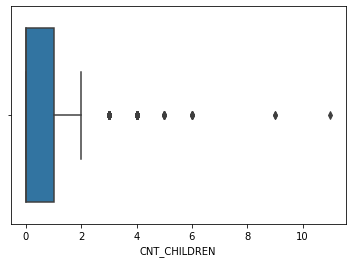

In [67]:
sns.boxplot(TARGET_ONE['CNT_CHILDREN'])
plt.show()

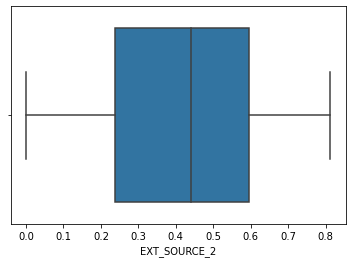

In [68]:
sns.boxplot(TARGET_ONE['EXT_SOURCE_2'])
plt.show()

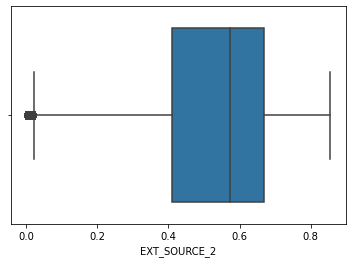

In [69]:
sns.boxplot(TARGET_ZERO['EXT_SOURCE_2'])
plt.show()

## Bivariate Analysis

### numerical to numreical

#### REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_REGISTRATION,AMT_ANNUITY, AMT_INCOME_TOTAL, DAYS_EMPLOYED

In [70]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_ANNUITY_BUCKET,AMT_GOODS_PRICE_BUCKET
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Avg Income,Average Goods
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Avg Income,Expensive Goods
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low Income,Cheap Goods
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Avg Income,Average Goods
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Avg Income,Average Goods


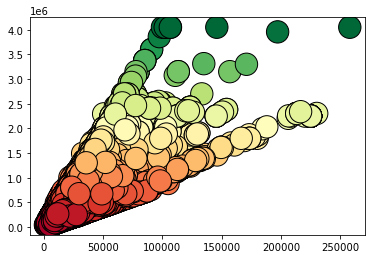

In [71]:
# corelation between 
plt.scatter(TARGET_ZERO.AMT_ANNUITY, TARGET_ZERO.AMT_CREDIT, c=TARGET_ZERO.AMT_CREDIT, cmap="RdYlGn", s=500, edgecolors="black")
plt.show()

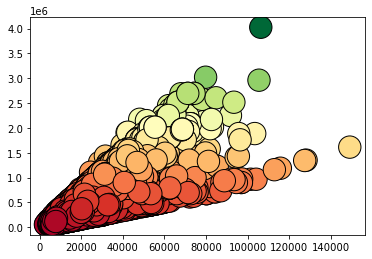

In [72]:
plt.scatter(TARGET_ONE.AMT_ANNUITY, TARGET_ONE.AMT_CREDIT, c=TARGET_ONE.AMT_CREDIT, cmap="RdYlGn", s=500, edgecolors="black")
plt.show()

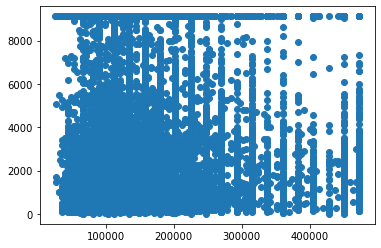

In [73]:
plt.scatter(TARGET_ONE.AMT_INCOME_TOTAL, TARGET_ONE.DAYS_EMPLOYED)
plt.show()

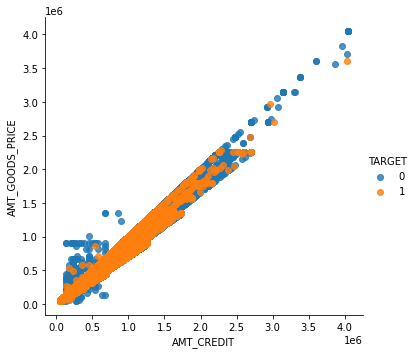

In [74]:
sns.lmplot('AMT_CREDIT', 'AMT_GOODS_PRICE', data=data, hue = 'TARGET', fit_reg = False)
plt.show()

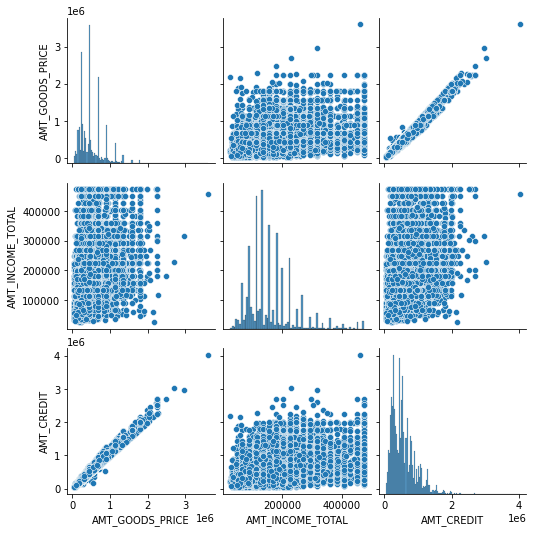

In [75]:
sns.pairplot(data = TARGET_ONE, vars = ['AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'AMT_CREDIT'])
plt.show()

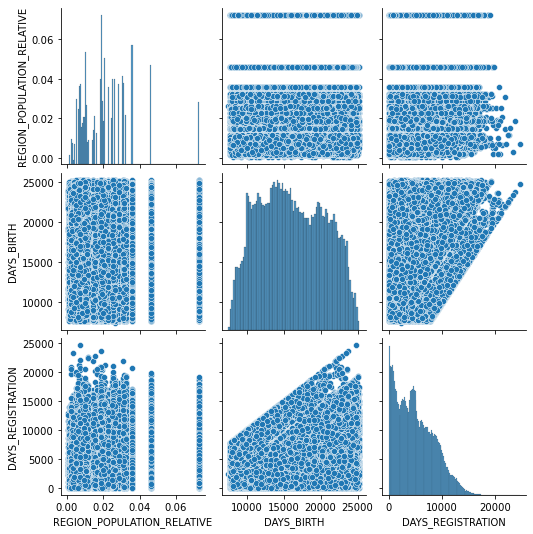

In [76]:
sns.pairplot(data = TARGET_ZERO, vars = ['REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_REGISTRATION'])
plt.show()

#### numerical - categorical

In [77]:
TARGET_ZERO.groupby('CODE_GENDER')['AMT_INCOME_TOTAL'].median()

CODE_GENDER
F    135000.0
M    180000.0
Name: AMT_INCOME_TOTAL, dtype: float64

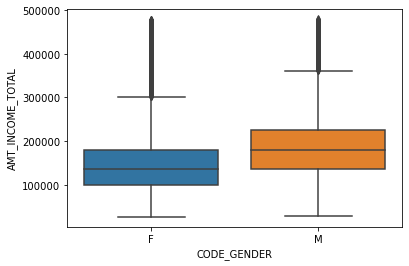

In [78]:
sns.boxplot(data = TARGET_ZERO, x = 'CODE_GENDER', y = 'AMT_INCOME_TOTAL')
plt.show()

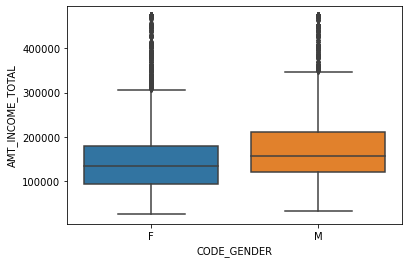

In [79]:
sns.boxplot(data = TARGET_ONE, x = 'CODE_GENDER', y = 'AMT_INCOME_TOTAL')
plt.show()

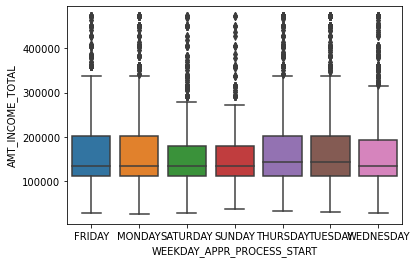

In [80]:
sns.boxplot(data = TARGET_ONE, x = 'WEEKDAY_APPR_PROCESS_START', y = 'AMT_INCOME_TOTAL')
plt.show()

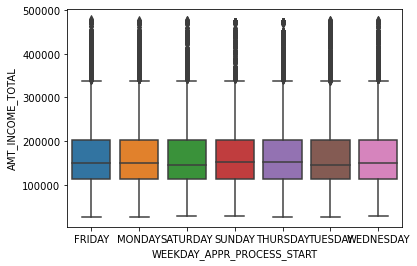

In [81]:
sns.boxplot(data = TARGET_ZERO, x = 'WEEKDAY_APPR_PROCESS_START', y = 'AMT_INCOME_TOTAL')
plt.show()

### Categorical - Categrical

(array([0, 1]), [Text(0, 0, 'Cash loans'), Text(1, 0, 'Revolving loans')])

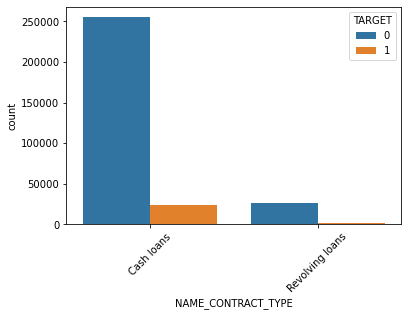

In [82]:
#
sns.countplot(x = 'NAME_CONTRACT_TYPE', hue = 'TARGET', data = data)
plt.xticks(rotation = 45)


#sns.catplot(y='CODE_GENDER', hue = 'TARGET',  data = data)

<AxesSubplot:xlabel='CODE_GENDER', ylabel='count'>

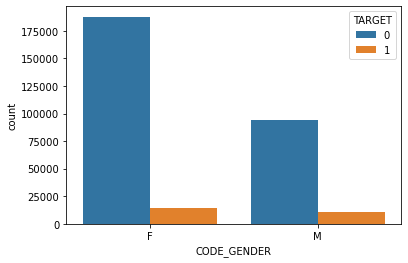

In [83]:
sns.countplot(x = 'CODE_GENDER', hue = 'TARGET', data = data)

<AxesSubplot:ylabel='NAME_FAMILY_STATUS'>

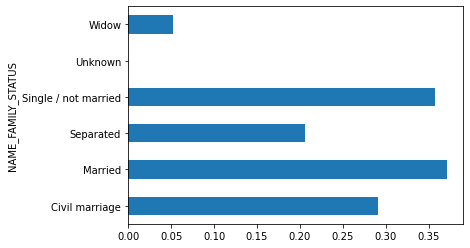

In [84]:
TARGET_ZERO['gender'] = np.where(TARGET_ZERO['CODE_GENDER'] == 'F', 0, 1)
TARGET_ZERO[~(TARGET_ZERO.NAME_FAMILY_STATUS == 'Unknown')].groupby(['NAME_FAMILY_STATUS'])['gender'].mean().plot.barh()

<AxesSubplot:ylabel='NAME_FAMILY_STATUS'>

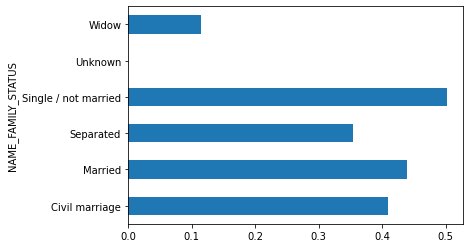

In [85]:
TARGET_ONE['gender'] = np.where(TARGET_ONE['CODE_GENDER'] == 'F', 0, 1)
TARGET_ONE.groupby(['NAME_FAMILY_STATUS'])['gender'].mean().plot.barh()

In [86]:
prev_data_set = pd.read_csv('D:/Leena_DataScience/EDA_CaseStudy/previous_application.csv')

In [87]:
prev_data_set.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

# Merging 2 files

In [88]:
merged_set = data.merge(prev_data_set, on = 'SK_ID_CURR', how = 'left', left_index =True)

In [89]:
merged_set.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       ...
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object', length=119)

In [90]:
merged_set[['AMT_ANNUITY_x','AMT_GOODS_PRICE_x','RATE_INTEREST_PRIVILEGED']].corr()

,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,RATE_INTEREST_PRIVILEGED
AMT_ANNUITY_x,1.000000,0.762961,-0.058304
AMT_GOODS_PRICE_x,0.762961,1.000000,-0.089097
RATE_INTEREST_PRIVILEGED,-0.058304,-0.089097,1.000000


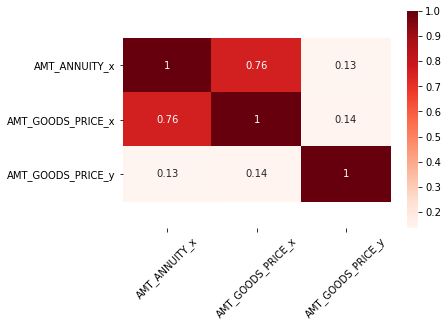

In [91]:
ax = sns.heatmap(merged_set[['AMT_ANNUITY_x','AMT_GOODS_PRICE_x','AMT_GOODS_PRICE_y']].corr(), annot = True, cmap = 'Reds')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.xticks(rotation = 45)
plt.yticks(rotation = 0)
plt.show()
# we can see that the correlation between AMT_ANNUITY and AMT_GOOD_PRICE present application is high unlike in previous application

In [92]:
merged_set[['AMT_INCOME_TOTAL','DAYS_FIRST_DUE','DAYS_LAST_DUE','DAYS_TERMINATION']].corr()

,AMT_INCOME_TOTAL,DAYS_FIRST_DUE,DAYS_LAST_DUE,DAYS_TERMINATION
AMT_INCOME_TOTAL,1.000000,-0.001457,0.002202,0.002749
DAYS_FIRST_DUE,-0.001457,1.000000,0.397346,0.321467
DAYS_LAST_DUE,0.002202,0.397346,1.000000,0.927578
DAYS_TERMINATION,0.002749,0.321467,0.927578,1.000000


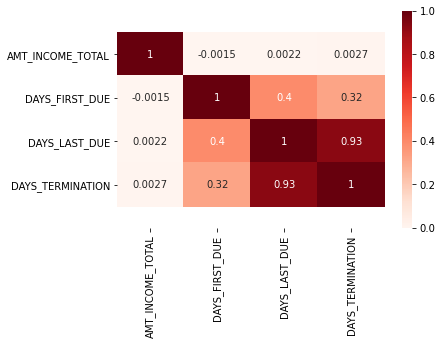

In [93]:
ax = sns.heatmap(merged_set[['AMT_INCOME_TOTAL','DAYS_FIRST_DUE','DAYS_LAST_DUE','DAYS_TERMINATION']].corr(), annot = True, cmap = 'Reds')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.show()
#There is a high correlation between DAYS_LAST_DUE and DAYS_TERMINATION

In [94]:
merged_set[['AMT_CREDIT_x','AMT_INCOME_TOTAL','NFLAG_INSURED_ON_APPROVAL']].corr()

,AMT_CREDIT_x,AMT_INCOME_TOTAL,NFLAG_INSURED_ON_APPROVAL
AMT_CREDIT_x,1.000000,0.382635,-0.016154
AMT_INCOME_TOTAL,0.382635,1.000000,0.007819
NFLAG_INSURED_ON_APPROVAL,-0.016154,0.007819,1.000000


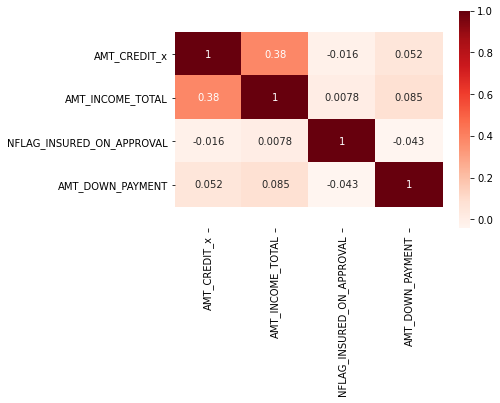

In [95]:
ax = sns.heatmap(merged_set[['AMT_CREDIT_x','AMT_INCOME_TOTAL','NFLAG_INSURED_ON_APPROVAL', 'AMT_DOWN_PAYMENT']].corr(), annot = True, cmap = 'Reds')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.show()

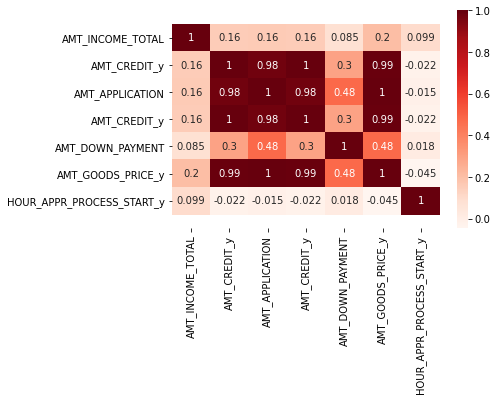

In [96]:
# LEt's check the correlation in previous loan record

ax = sns.heatmap(merged_set[['AMT_INCOME_TOTAL','AMT_CREDIT_y','AMT_APPLICATION', 'AMT_CREDIT_y', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE_y', 'WEEKDAY_APPR_PROCESS_START_y', 'HOUR_APPR_PROCESS_START_y']].corr(), annot = True, cmap = 'Reds')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.show()

#we can see that thereis a high correlation between AMT_CREDIT and AMT_APPLICATION